In [60]:
# MNIST dataset

In [61]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
%matplotlib inline

In [62]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4 <= Dynamic plotting
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()
    

In [63]:
# loading train-test data from keras mnist dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()

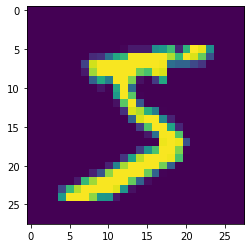

In [64]:
plt.imshow(X_train[0])

In [65]:
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.")

Training dataset shape (60000, 28, 28)  and  (60000,)
Test dataset shape (10000, 28, 28)  and  (10000,)
Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.


In [66]:
# input is  2 dimensional vector(28x28 image)
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.")

Training dataset shape (60000, 784)  and  (60000,)
Test dataset shape (10000, 784)  and  (10000,)
Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.


In [67]:
# printing datapoint
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### We can see the values in X_train[0] lies between 0 to 255 but so to apply any Neural Network algorithms we need to normlize it


In [68]:
# normlizing dataset
X_train = X_train/255.0
X_test = X_test/255.0
print("Now each values lies between 0 to 1")

Now each values lies between 0 to 1


In [69]:
# we have output as number between 0 to 9
# we have to make it vector (OneHotEncoding)
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)
print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **1. Softmax** **Classifier**

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# we can create sequential model by just adding layers like stack
# model parameter
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [71]:
# creating sequential model
model = Sequential()

# The first layer in a Sequential model should know input shape 
# only the first should know input shape because following layers can do automatic shape inference)
# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

# we will use softmax because we are using multiclass classification

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [72]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

model.compile(optimizer='sgd',loss="categorical_crossentropy", metrics=['accuracy'])

# fitting model on dataset
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2852 - accuracy: 0.7082 - val_loss: 0.8041 - val_accuracy: 0.8390
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7103 - accuracy: 0.8442 - val_loss: 0.6022 - val_accuracy: 0.8640
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5832 - accuracy: 0.8606 - val_loss: 0.5219 - val_accuracy: 0.8751
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.8696 - val_loss: 0.4770 - val_accuracy: 0.8811
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4857 - accuracy: 0.8752 - val_loss: 0.4477 - val_accuracy: 0.8856
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.8801 - val_loss: 0.4267 - val_accuracy: 0.8905
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.8834 - val_loss: 0.4107 - val_accuracy: 0.8930
Epoch 

Test score: 0.33485978841781616
Test accuracy: 0.9085000157356262


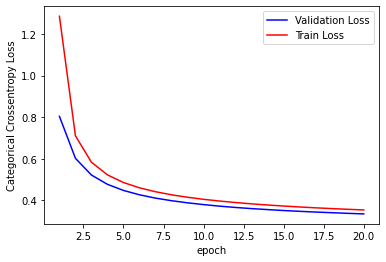

In [73]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


After 20 epoch we got 90% accuracy on unseen data.

# **2. MLP with sigmoid activation and SGD optimizer**

In [74]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid',input_shape=(input_dim,)))
model_sigmoid.add(Dense(128,activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

model_sigmoid.summary()
# 1 bias is added during training of MLP Total_param = (784+1)*512 + (512+1)*128 + (128+1)*10 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [75]:
model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_sigmoid.fit(X_train,y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 2.2682 - accuracy: 0.2254 - val_loss: 2.2219 - val_accuracy: 0.3565
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1783 - accuracy: 0.4523 - val_loss: 2.1234 - val_accuracy: 0.4498
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.0612 - accuracy: 0.5496 - val_loss: 1.9813 - val_accuracy: 0.5859
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.8925 - accuracy: 0.6082 - val_loss: 1.7819 - val_accuracy: 0.6439
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.6736 - accuracy: 0.6519 - val_loss: 1.5456 - val_accuracy: 0.6864
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.4417 - accuracy: 0.6931 - val_loss: 1.3213 - val_accuracy: 0.7285
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2391 - accuracy: 0.7317 - val_loss: 1.1397 - val_accuracy: 0.7520
Epoch 

Test score :  0.46695372462272644
Test accuracy:  0.8773000240325928


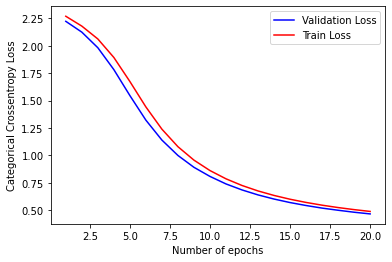

In [76]:
score = model_sigmoid.evaluate(X_test,y_test,verbose=0)
print("Test score : ", score[0])
print("Test accuracy: ", score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Number of epochs')
ax.set_ylabel("Categorical Crossentropy Loss")

x = list(range(1,1+nb_epoch))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


After 20 epoch we got 87% accuracy on unseen data.

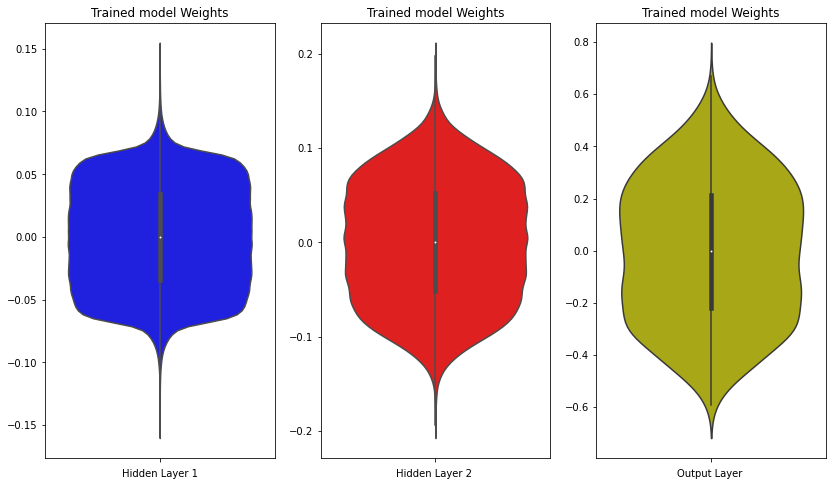

In [77]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(14,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3. MLP with relu activation and Adam optimizer**

In [78]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0,stddev=0.05, seed=None)))
model_relu.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125,seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

model_relu.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [79]:
model_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model_relu.fit(X_train,y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2221 - accuracy: 0.9351 - val_loss: 0.1117 - val_accuracy: 0.9655
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0802 - val_accuracy: 0.9739
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0727 - val_accuracy: 0.9763
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0690 - val_accuracy: 0.9807
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch

Test score :  0.09475281089544296
Test accuracy:  0.9800999760627747


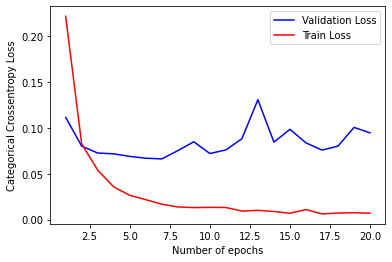

In [80]:
score = model_relu.evaluate(X_test,y_test,verbose=0)
print("Test score : ", score[0])
print("Test accuracy: ", score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('Number of epochs')
ax.set_ylabel("Categorical Crossentropy Loss")
x = list(range(1,1+nb_epoch))
# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

We got 98% accuracy on unseen test data.

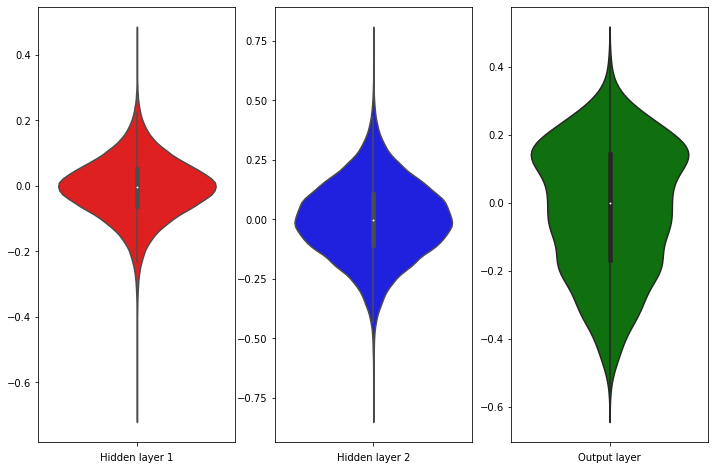

In [81]:
w_after = model_relu.get_weights()
hidden1_w = w_after[0].flatten().reshape(-1,1)
hidden2_w = w_after[2].flatten().reshape(-1,1)
output_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
ax = sns.violinplot(y=hidden1_w,color='r')
plt.xlabel('Hidden layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=hidden2_w,color='b')
plt.xlabel('Hidden layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=output_w,color='g')
plt.xlabel('Output layer')

plt.show()

# **4. MLP + Batch Normlization and Adam optimizer**

In [82]:
# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(Ni+N(i+1)). sqrt(2/(f_in + f_out))
# sqrt(2/(784+512))
# h1 => Ni=784 and N(i+1)=512 => σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# sqrt(2/(512+128))
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# sqrt(2/(128+10))
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization


model_batch = Sequential()

model_batch.add(Dense(512,activation='sigmoid',input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0,stddev=0.039,seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128,activation='sigmoid', kernel_initializer=RandomNormal(mean=0,stddev=0.055,seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation='softmax'))


model_batch.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [83]:
model_batch.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_batch.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2687 - accuracy: 0.9211 - val_loss: 0.1875 - val_accuracy: 0.9514
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1416 - accuracy: 0.9590 - val_loss: 0.1285 - val_accuracy: 0.9609
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1004 - accuracy: 0.9702 - val_loss: 0.1080 - val_accuracy: 0.9676
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0756 - accuracy: 0.9775 - val_loss: 0.0915 - val_accuracy: 0.9717
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0580 - accuracy: 0.9832 - val_loss: 0.0852 - val_accuracy: 0.9731
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.0814 - val_accuracy: 0.9739

Test Score :  0.08218642324209213
Test Accuracy :  0.9796000123023987


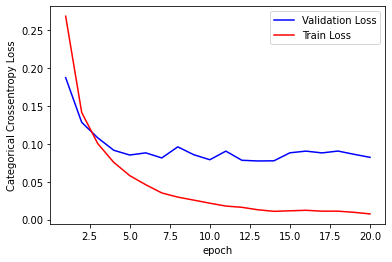

In [84]:
score = model_batch.evaluate(X_test,y_test,verbose=0)
print("Test Score : ",score[0])
print("Test Accuracy : ",score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)


We got ~98% accuracy on unseen test data.

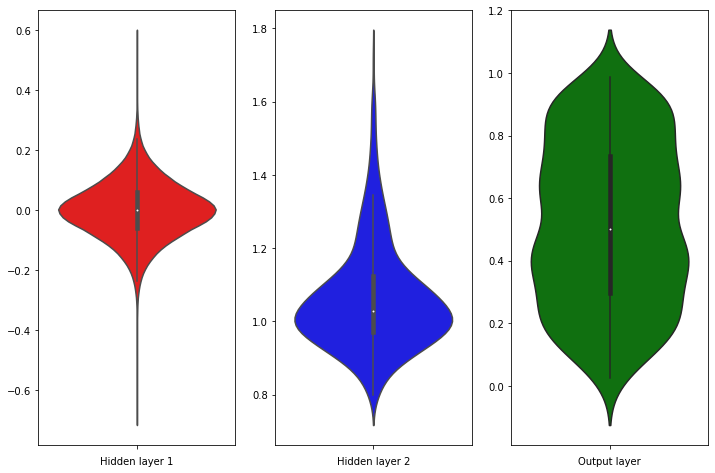

In [85]:
w_after = model_batch.get_weights()
hidden1_w = w_after[0].flatten().reshape(-1,1)
hidden2_w = w_after[2].flatten().reshape(-1,1)
output_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
ax = sns.violinplot(y=hidden1_w,color='r')
plt.xlabel('Hidden layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=hidden2_w,color='b')
plt.xlabel('Hidden layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=output_w,color='g')
plt.xlabel('Output layer')

plt.show()

# **5. MLP + Dropout and Adam optimizer**

In [86]:
 #https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-kera
 from keras.layers import Dropout

 model_drop = Sequential()
 model_drop.add(Dense(512,activation='sigmoid', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.039,seed=None)))
 model_drop.add(BatchNormalization())
 model_drop.add(Dropout(0.5))

 model_drop.add(Dense(128,activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)))
 model_drop.add(BatchNormalization())
 model_drop.add(Dropout(0.5))

 model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

In [87]:
model_drop.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model_drop.fit(X_train,y_train,batch_size=batch_size,epochs=
                         nb_epoch,verbose=1,validation_data = (X_test,y_test))

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4830 - accuracy: 0.8570 - val_loss: 0.2748 - val_accuracy: 0.9169
Epoch 2/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3247 - accuracy: 0.9029 - val_loss: 0.2179 - val_accuracy: 0.9355
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.2843 - accuracy: 0.9158 - val_loss: 0.1877 - val_accuracy: 0.9445
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.2599 - accuracy: 0.9235 - val_loss: 0.1706 - val_accuracy: 0.9489
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.2338 - accuracy: 0.9295 - val_loss: 0.1577 - val_accuracy: 0.9523
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2159 - accuracy: 0.9363 - val_loss: 0.1358 - val_accuracy: 0.9605
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1971 - accuracy: 0.9408 - val_loss: 0.1221 - val_accuracy: 0.9622

Test Score :  0.06738817691802979
Test accuracy :  0.9812999963760376


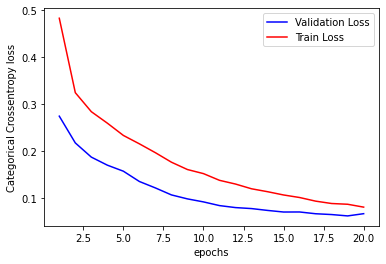

In [88]:
score = model_drop.evaluate(X_test,y_test,verbose=0)
print("Test Score : ",score[0])
print('Test accuracy : ',score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epochs')
ax.set_ylabel("Categorical Crossentropy loss")

x = list(range(1,1+nb_epoch))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)

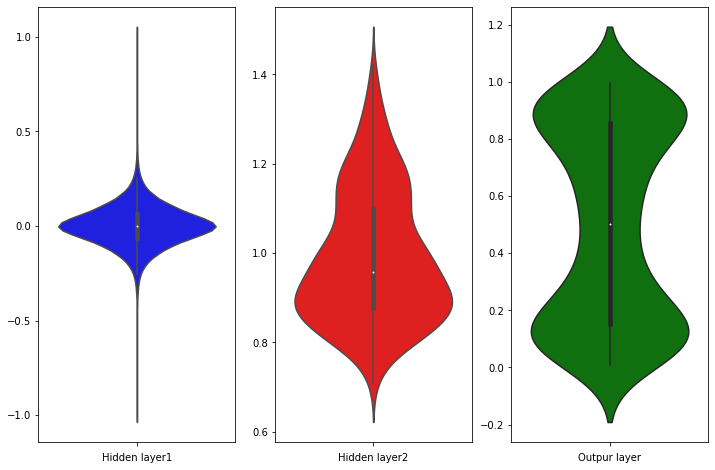

In [89]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,8))

plt.title('Weight matrices after model trained')
plt.subplot(1,3,1)
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel("Hidden layer1")

plt.subplot(1,3,2)
ax = sns.violinplot(y=h2_w,color='r')
plt.xlabel("Hidden layer2")

plt.subplot(1,3,3)
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel("Outpur layer")

plt.show()

# **Hyperparameter tuning using Sklearn**

In [103]:
def best_params(activ):
  model = Sequential()
  model.add(Dense(512,activation=activ,input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.062,seed=None)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(128,activation=activ,kernel_initializer=RandomNormal(mean=0.0,stddev=0.125,seed=None)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(output_dim,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [104]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

activ= ['sigmoid','relu']

model = KerasClassifier(build_fn=best_params,epochs=nb_epoch,batch_size=batch_size,verbose=0)
param_grid = dict(activ=activ)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

In [107]:
print("Best accuracy : %f using %s" % (grid_result.best_score_ * 100 , grid_result.best_params_))

Best accuracy : 97.980001 using {'activ': 'relu'}
